In [4]:
# Numerical computation
import numpy as np

# Data handling
import pandas as pd
pd.set_option('display.max_columns', None)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model selection & training
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [5]:
df = pd.read_csv("startup data.csv")
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [6]:
df.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.00000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,2.541975e+07,1.841820,0.527627,0.114843,0.089924,0.045504,0.221018,0.165764,0.156013,0.08559,0.079090,0.067172,0.056338,0.027086,0.036836,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,1.896344e+08,1.322632,0.499507,0.319005,0.286228,0.208519,0.415158,0.372070,0.363064,0.27991,0.270025,0.250456,0.230698,0.162421,0.188462,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,2.725000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,2.472500e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


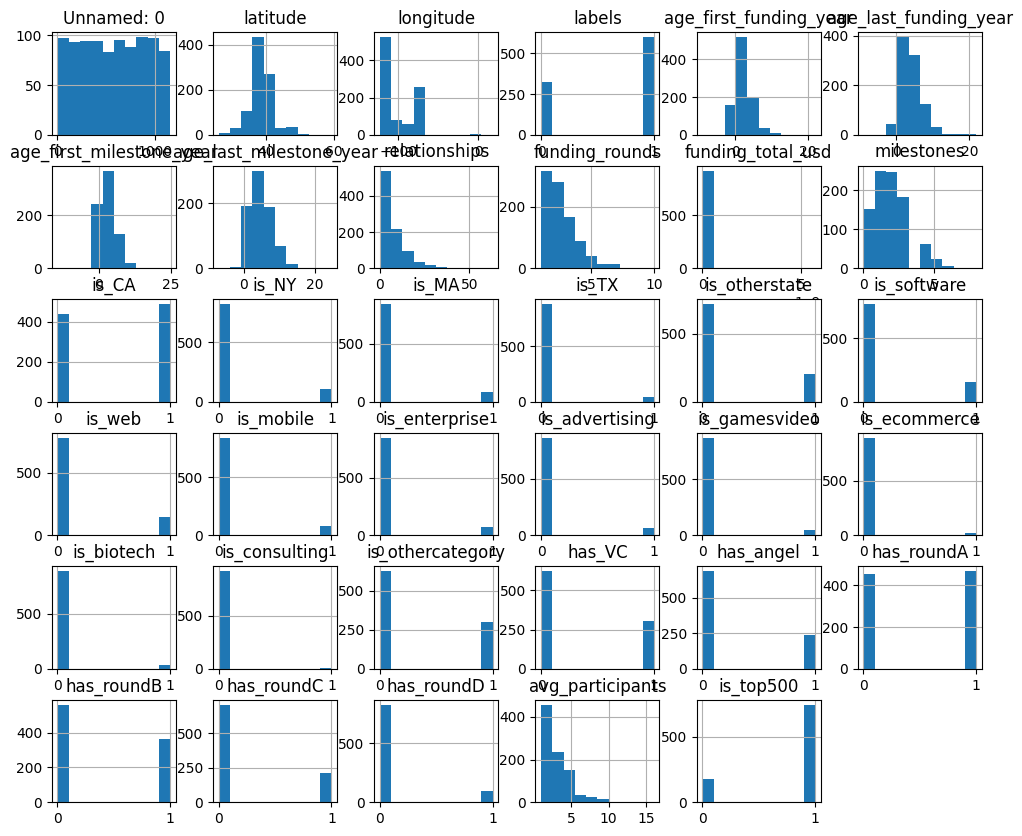

In [7]:
df.hist(figsize=(12, 10))
plt.show()

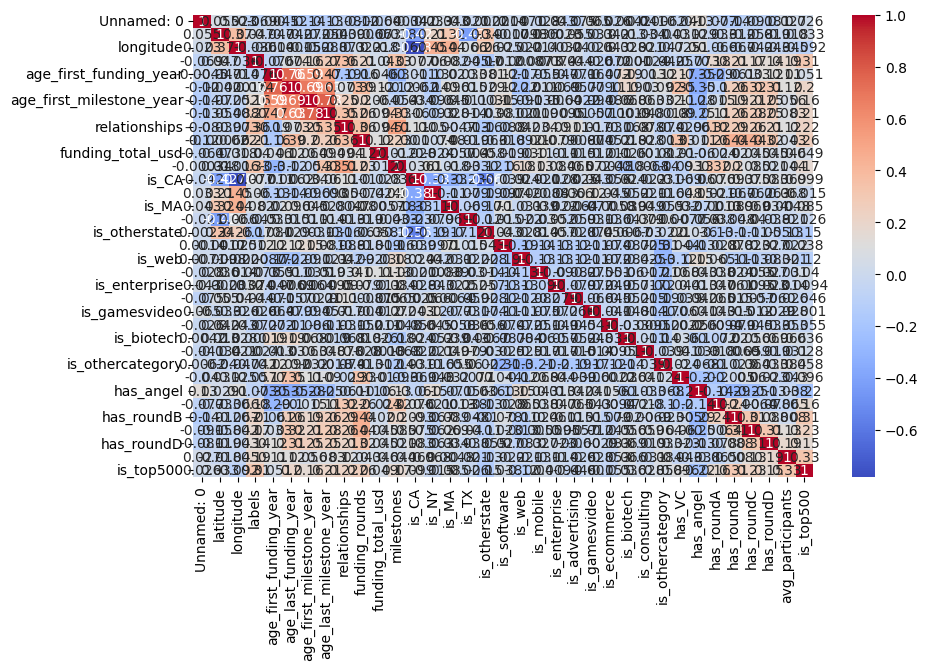

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.show()

In [10]:
df['State'] = 'other'

df.loc[df['state_code'] == 'CA', 'State'] = 'CA'
df.loc[df['state_code'] == 'NY', 'State'] = 'NY'
df.loc[df['state_code'] == 'MA', 'State'] = 'MA'
df.loc[df['state_code'] == 'TX', 'State'] = 'TX'
df.loc[df['state_code'] == 'WA', 'State'] = 'WA'

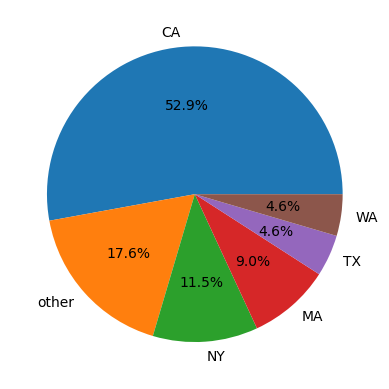

In [11]:
state_count = df['State'].value_counts()

plt.pie(state_count, labels=state_count.index, autopct='%1.1f%%')
plt.show()

In [12]:
df['category'] = 'other'

df.loc[df['category_code'] == 'software', 'category'] = 'software'
df.loc[df['category_code'] == 'web', 'category'] = 'web'
df.loc[df['category_code'] == 'mobile', 'category'] = 'mobile'
df.loc[df['category_code'] == 'enterprise', 'category'] = 'enterprise'
df.loc[df['category_code'] == 'advertising', 'category'] = 'advertising'
df.loc[df['category_code'] == 'games_video', 'category'] = 'games_video'
df.loc[df['category_code'] == 'semiconductor', 'category'] = 'semiconductor'
df.loc[df['category_code'] == 'network_hosting', 'category'] = 'network_hosting'
df.loc[df['category_code'] == 'biotech', 'category'] = 'biotech'
df.loc[df['category_code'] == 'hardware', 'category'] = 'hardware'

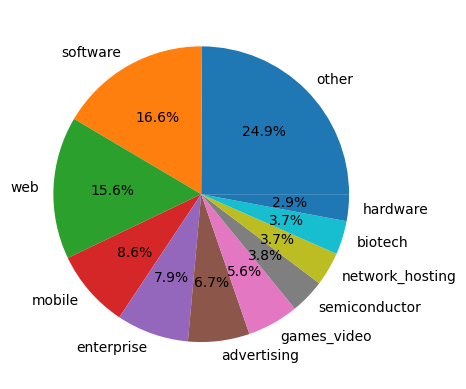

In [13]:
category_count = df['category'].value_counts()

plt.pie(category_count, labels=category_count.index, autopct='%1.1f%%')
plt.show()

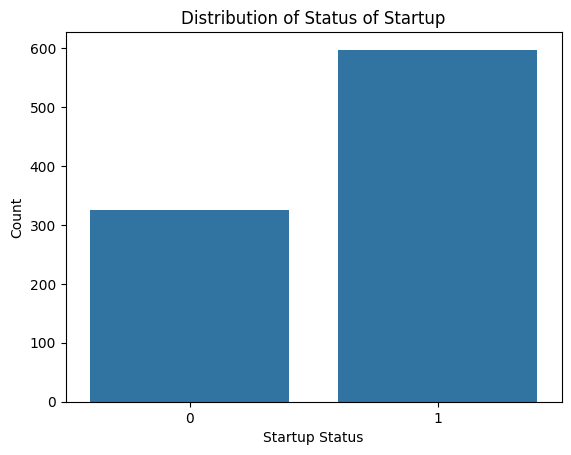

In [14]:
status_count = df['labels'].value_counts()

sns.barplot(x=status_count.index, y=status_count.values)
plt.xlabel("Startup Status")
plt.ylabel("Count")
plt.title("Distribution of Status of Startup")
plt.show()

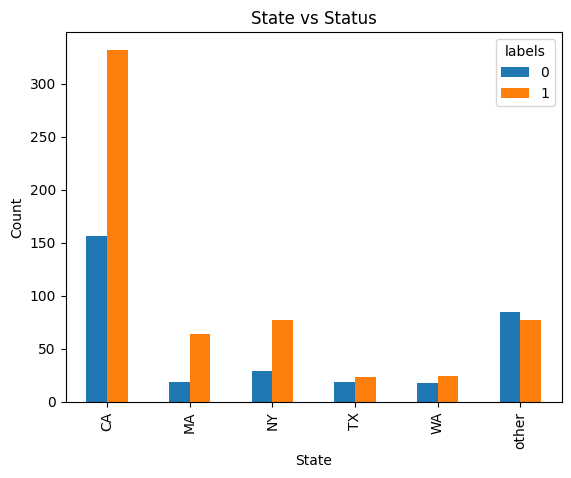

In [15]:
state_status = pd.crosstab(df['State'], df['labels'])

state_status.plot(kind='bar', stacked=False)
plt.xlabel("State")
plt.ylabel("Count")
plt.title("State vs Status")
plt.show()

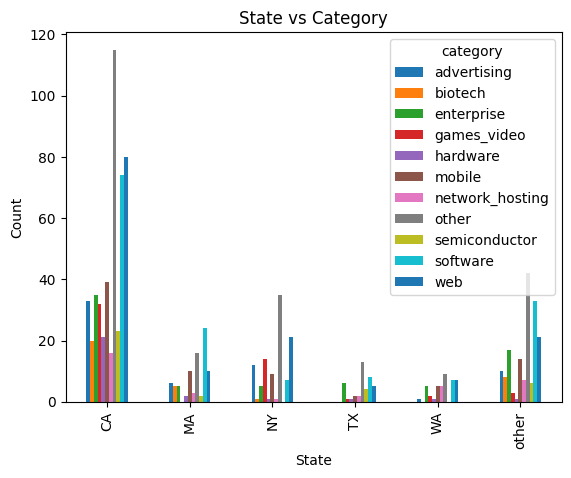

In [16]:
state_category = pd.crosstab(df['State'], df['category'])

state_category.plot(kind='bar')
plt.xlabel("State")
plt.ylabel("Count")
plt.title("State vs Category")
plt.show()

In [18]:
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status', 'State', 'category'],
      dtype='object')

In [19]:
df['founded_at'] = pd.to_datetime(df['founded_at'], errors='coerce')

df['founded_year'] = df['founded_at'].dt.year

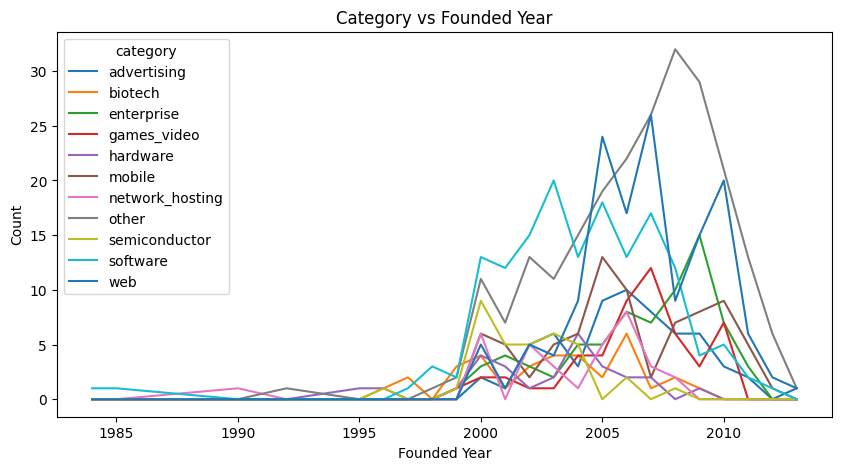

In [20]:
cat_year = pd.crosstab(df['founded_year'], df['category'])

cat_year.plot(kind='line', figsize=(10,5))
plt.xlabel("Founded Year")
plt.ylabel("Count")
plt.title("Category vs Founded Year")
plt.show()

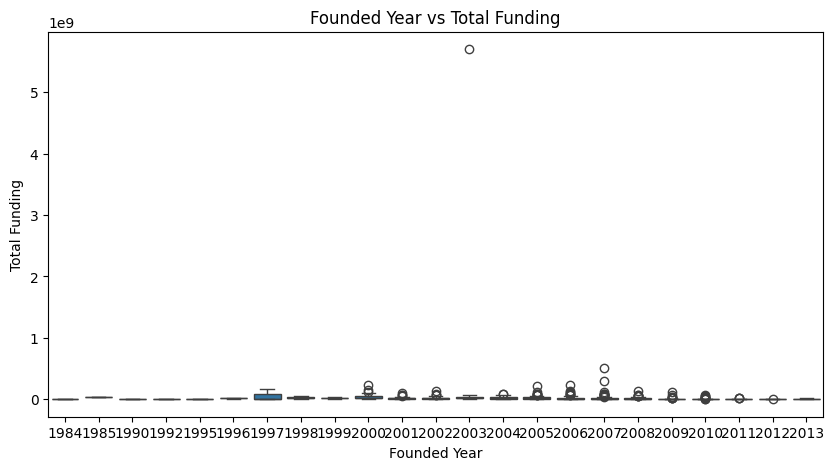

In [21]:
plt.figure(figsize=(10,5))

sns.boxplot(x=df['founded_year'], y=df['funding_total_usd'])

plt.xlabel("Founded Year")
plt.ylabel("Total Funding")
plt.title("Founded Year vs Total Funding")

plt.show()

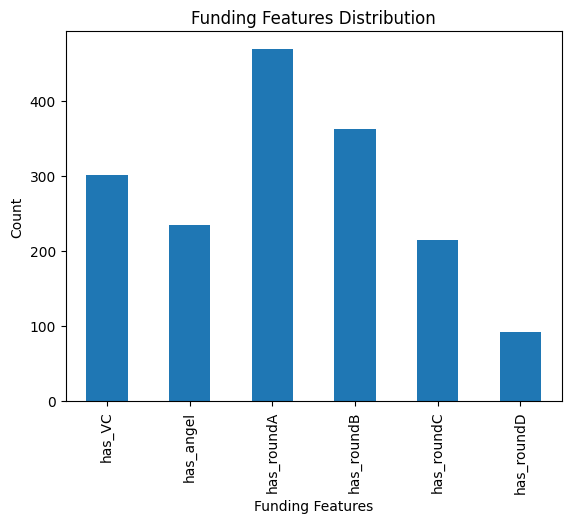

In [22]:
funding_features = ['has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD']

feature_counts = df[funding_features].sum()

feature_counts.plot(kind='bar')

plt.xlabel("Funding Features")
plt.ylabel("Count")
plt.title("Funding Features Distribution")

plt.show()

In [23]:
df.describe()

,Unnamed: 0,latitude,longitude,labels,founded_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,founded_year
count,923.000000,923.000000,923.000000,923.000000,923,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.00000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2005-09-10 00:57:43.488624128,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,2.541975e+07,1.841820,0.527627,0.114843,0.089924,0.045504,0.221018,0.165764,0.156013,0.08559,0.079090,0.067172,0.056338,0.027086,0.036836,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317,2005.496208
min,1.000000,25.752358,-122.756956,0.000000,1984-01-01 00:00:00,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1984.000000
25%,283.500000,37.388869,-122.198732,0.000000,2003-01-01 00:00:00,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,2.725000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,2003.000000
50%,577.000000,37.779281,-118.374037,1.000000,2006-01-01 00:00:00,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000,2006.000000
75%,866.500000,40.730646,-77.214731,1.000000,2008-04-01 00:00:00,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,2.472500e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000,2008.000000
max,1153.000000,59.335232,18.057121,1.000000,2013-04-16 00:00:00,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,2013.000000
std,333.585431,3.741497,22.394167,0.478222,NaN,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,1.896344e+08,1.322632,0.499507,0.319005,0.286228,0.208519,0.415158,0.372070,0.363064,0.27991,0.270025,0.250456,0.230698,0.162421,0.188462,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052,3.528738


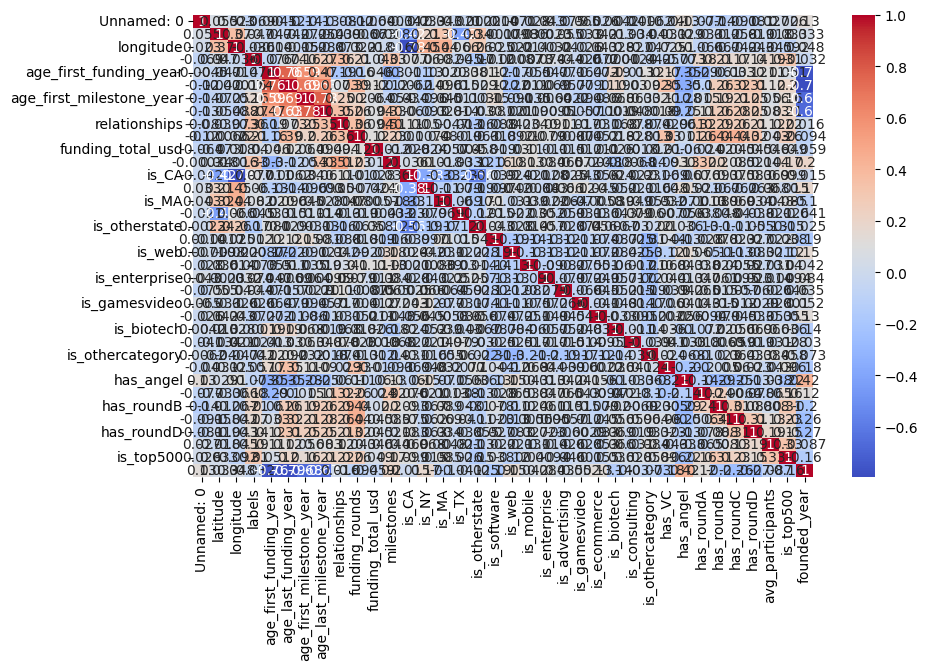

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(),
            annot=True,
            cmap='coolwarm')

plt.show()

In [25]:
print(df['state_code'].equals(df['state_code.1']))

False


In [26]:
df.loc[df['state_code'] != df['state_code.1'], ['state_code', 'state_code.1']].head()

,state_code,state_code.1
515,CA,NaN


In [27]:
df = df.drop(columns=['state_code.1'])
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'is_CA', 'is_NY', 'is_MA', 'is_TX',
       'is_otherstate', 'category_code', 'is_software', 'is_web', 'is_mobile',
       'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
       'is_biotech', 'is_consulting', 'is_othercategory', 'object_id',
       'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC',
       'has_roundD', 'avg_participants', 'is_top500', 'status', 'State',
       'category', 'founded_year'],
      dtype='object')

In [28]:
df.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enter

In [29]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 6'])

In [30]:
df.columns

Index(['state_code', 'latitude', 'longitude', 'zip_code', 'id', 'city', 'name',
       'labels', 'founded_at', 'closed_at', 'first_funding_at',
       'last_funding_at', 'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status', 'State', 'category', 'founded_year'],
      dtype='object')

In [31]:
df['age_first_milestone_year'] = df['age_first_milestone_year'].fillna(0)
df['age_last_milestone_year'] = df['age_last_milestone_year'].fillna(0)

In [32]:
df[['age_first_milestone_year', 'age_last_milestone_year']].isnull().sum()

age_first_milestone_year    0
age_last_milestone_year     0
dtype: int64

In [33]:
df['closed_at'] = pd.to_datetime(df['closed_at'], errors='coerce')

In [34]:
df['is_closed'] = df['closed_at'].notnull().astype(int)

In [35]:
df['is_closed'].value_counts()

is_closed
0    588
1    335
Name: count, dtype: int64

In [36]:
df = df.drop(columns=[
    'category_code',
    'is_software',
    'is_web',
    'is_mobile',
    'is_enterprise',
    'is_advertising',
    'is_gamesvideo',
    'is_ecommerce',
    'is_biotech',
    'is_consulting',
    'is_othercategory'
])

In [37]:
df.columns

Index(['state_code', 'latitude', 'longitude', 'zip_code', 'id', 'city', 'name',
       'labels', 'founded_at', 'closed_at', 'first_funding_at',
       'last_funding_at', 'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'object_id', 'has_VC', 'has_angel',
       'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'is_top500', 'status', 'State', 'category',
       'founded_year', 'is_closed'],
      dtype='object')

In [38]:
X = df.drop('status', axis=1)
y = df['status']

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(738, 38)
(185, 38)
(738,)
(185,)


In [48]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}

In [50]:
df.dtypes

state_code                          object
latitude                           float64
longitude                          float64
zip_code                            object
id                                  object
city                                object
name                                object
labels                               int64
founded_at                  datetime64[ns]
closed_at                   datetime64[ns]
first_funding_at                    object
last_funding_at                     object
age_first_funding_year             float64
age_last_funding_year              float64
age_first_milestone_year           float64
age_last_milestone_year            float64
relationships                        int64
funding_rounds                       int64
funding_total_usd                    int64
milestones                           int64
is_CA                                int64
is_NY                                int64
is_MA                                int64
is_TX      

In [51]:
df = df.drop(columns=[
    'state_code',
    'zip_code',
    'id',
    'city',
    'name',
    'first_funding_at',
    'last_funding_at',
    'object_id',
    'State',
    'category'
])

In [52]:
df.dtypes

latitude                           float64
longitude                          float64
labels                               int64
founded_at                  datetime64[ns]
closed_at                   datetime64[ns]
age_first_funding_year             float64
age_last_funding_year              float64
age_first_milestone_year           float64
age_last_milestone_year            float64
relationships                        int64
funding_rounds                       int64
funding_total_usd                    int64
milestones                           int64
is_CA                                int64
is_NY                                int64
is_MA                                int64
is_TX                                int64
is_otherstate                        int64
has_VC                               int64
has_angel                            int64
has_roundA                           int64
has_roundB                           int64
has_roundC                           int64
has_roundD 

In [53]:
X = df.drop('status', axis=1)
y = df['status']

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [55]:
df['status'] = df['status'].astype('category').cat.codes

In [56]:
X = df.drop('status', axis=1)
y = df['status']

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [58]:
X.dtypes

latitude                           float64
longitude                          float64
labels                               int64
founded_at                  datetime64[ns]
closed_at                   datetime64[ns]
age_first_funding_year             float64
age_last_funding_year              float64
age_first_milestone_year           float64
age_last_milestone_year            float64
relationships                        int64
funding_rounds                       int64
funding_total_usd                    int64
milestones                           int64
is_CA                                int64
is_NY                                int64
is_MA                                int64
is_TX                                int64
is_otherstate                        int64
has_VC                               int64
has_angel                            int64
has_roundA                           int64
has_roundB                           int64
has_roundC                           int64
has_roundD 

In [59]:
X = X.drop(columns=['founded_at', 'closed_at'])

In [60]:
X.dtypes

latitude                    float64
longitude                   float64
labels                        int64
age_first_funding_year      float64
age_last_funding_year       float64
age_first_milestone_year    float64
age_last_milestone_year     float64
relationships                 int64
funding_rounds                int64
funding_total_usd             int64
milestones                    int64
is_CA                         int64
is_NY                         int64
is_MA                         int64
is_TX                         int64
is_otherstate                 int64
has_VC                        int64
has_angel                     int64
has_roundA                    int64
has_roundB                    int64
has_roundC                    int64
has_roundD                    int64
avg_participants            float64
is_top500                     int64
founded_year                  int32
is_closed                     int32
dtype: object

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [63]:
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [64]:
best_rf = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [65]:
y_pred = best_rf.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        73

    accuracy                           1.00       185
   macro avg       1.00      1.00      1.00       185
weighted avg       1.00      1.00      1.00       185



In [67]:
X.columns

Index(['latitude', 'longitude', 'labels', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'is_CA', 'is_NY', 'is_MA', 'is_TX',
       'is_otherstate', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants', 'is_top500',
       'founded_year', 'is_closed'],
      dtype='object')

In [68]:
X = X.drop(columns=['labels'])

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [70]:
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [71]:
best_rf = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, random_state=42)

In [73]:
y_pred = best_rf.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9837837837837838
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       112
           1       0.97      0.99      0.98        73

    accuracy                           0.98       185
   macro avg       0.98      0.98      0.98       185
weighted avg       0.98      0.98      0.98       185



In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [75]:
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [76]:
best_rf = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, random_state=42)

In [77]:
y_pred = best_rf.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9837837837837838
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       112
           1       0.97      0.99      0.98        73

    accuracy                           0.98       185
   macro avg       0.98      0.98      0.98       185
weighted avg       0.98      0.98      0.98       185



In [79]:
print(X.columns)

Index(['latitude', 'longitude', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'is_CA', 'is_NY', 'is_MA', 'is_TX',
       'is_otherstate', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants', 'is_top500',
       'founded_year', 'is_closed'],
      dtype='object')


In [80]:
X = X.drop(columns=['is_closed'])

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

grid_search.fit(X_train, y_train)

best_rf = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Accuracy: 0.7837837837837838


In [82]:
train_pred = best_rf.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Training Accuracy: 0.964769647696477
Test Accuracy: 0.7837837837837838


In [83]:
rf_tuned = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,              # reduce depth
    min_samples_leaf=3,        # force generalization
    random_state=42
)

rf_tuned.fit(X_train, y_train)

train_pred = rf_tuned.predict(X_train)
test_pred  = rf_tuned.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, train_pred))
print("Test Accuracy:", accuracy_score(y_test, test_pred))

Training Accuracy: 0.9024390243902439
Test Accuracy: 0.7837837837837838


In [84]:
import joblib

joblib.dump(best_rf, "random_forest_model.pkl")

['random_forest_model.pkl']

In [85]:
import os
os.listdir()

['.ipynb_checkpoints',
 'random_forest_model.pkl',
 'startup data.csv',
 'startup-success-model.ipynb']

In [86]:
loaded_model = joblib.load("random_forest_model.pkl")

In [87]:
loaded_pred = loaded_model.predict(X_test)

In [88]:
from sklearn.metrics import accuracy_score

print("Loaded Model Accuracy:", accuracy_score(y_test, loaded_pred))

Loaded Model Accuracy: 0.7837837837837838


In [89]:
print(X.columns)
print(len(X.columns))

Index(['latitude', 'longitude', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'is_CA', 'is_NY', 'is_MA', 'is_TX',
       'is_otherstate', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants', 'is_top500',
       'founded_year'],
      dtype='object')
24
